In [1]:
!pip install opendatasets --upgrade --quit


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --quit


In [4]:
import opendatasets as od
od.download("stackoverflow-developer-survey-2020")

Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_public.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_schema.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\README.txt


In [27]:
import pandas as pd
survey_raw_df=pd.read_csv('stackoverflow-developer-survey-2020\survey_results_public.csv')
survey_raw_df

Respondent                                         MainBranch Hobbyist  \
0               1                     I am a developer by profession      Yes   
1               2                     I am a developer by profession       No   
2               3                        I code primarily as a hobby      Yes   
3               4                     I am a developer by profession      Yes   
4               5  I used to be a developer by profession, but no...      Yes   
...           ...                                                ...      ...   
64456       64858                                                NaN      Yes   
64457       64867                                                NaN      Yes   
64458       64898                                                NaN      Yes   
64459       64925                                                NaN      Yes   
64460       65112                                                NaN      Yes   

        Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0       NaN         13  Monthly        NaN            NaN             Germany   
1       NaN         19      NaN        NaN            NaN      United Kingdom   
2       NaN         15      NaN        NaN            NaN  Russian Federation   
3      25.0         18      NaN        NaN            NaN             Albania   
4      31.0         16      NaN        NaN            NaN       United States   
...     ...        ...      ...        ...            ...                 ...   
64456   NaN         16      NaN        NaN            NaN       United States   
64457   NaN        NaN      NaN        NaN            NaN             Morocco   
64458   NaN        NaN      NaN        NaN            NaN            Viet Nam   
64459   NaN        NaN      NaN        NaN            NaN              Poland   
64460   NaN        NaN      NaN        NaN            NaN               Spain   

         CurrencyDesc  ...                  SurveyEase           SurveyLength  \
0       European Euro  ...  Neither easy nor difficult  Appropriate in length   
1      Pound sterling  ...                         NaN                    NaN   
2                 NaN  ...  Neither easy nor difficult  Appropriate in length   
3        Albanian lek  ...                         NaN                    NaN   
4                 NaN  ...                        Easy              Too short   
...               ...  ...                         ...                    ...   
64456             NaN  ...                         NaN                    NaN   
64457             NaN  ...                         NaN                    NaN   
64458             NaN  ...                         NaN                    NaN   
64459             NaN  ...                         NaN                    NaN   
64460             NaN  ...                         NaN                    NaN   

      Trans                                     UndergradMajor  \
0        No  Computer science, computer engineering, or sof...   
1       NaN  Computer science, computer engineering, or sof...   
2       NaN                                                NaN   
3        No  Computer science, computer engineering, or sof...   
4        No  Computer science, computer engineering, or sof...   
...     ...                                                ...   
64456   NaN  Computer science, computer engineering, or sof...   
64457   NaN                                                NaN   
64458   NaN                                                NaN   
64459   NaN                                                NaN   
64460   NaN  Computer science, computer engineering, or sof...   

            WebframeDesireNextYear                      WebframeWorkedWith  \
0                     ASP.NET Core                    ASP.NET;ASP.NET Core   
1                              NaN                                     NaN   
2                              NaN                           

In [65]:
schema_fname='stackoverflow-developer-survey-2020\survey_results_schema.csv'
schema_raw=pd.read_csv(sch_fname,index_col='Column').QuestionText
schema_raw


Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [52]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [66]:
schema = schema_raw[selected_columns]

In [53]:
len(selected_columns)

20

In [54]:
survey_df = survey_raw_df[selected_columns].copy()

In [55]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [56]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [35]:
survey_df.describe()

Age    Age1stCode     YearsCode  YearsCodePro   WorkWeekHrs
count  45446.000000  57473.000000  56784.000000  44133.000000  41151.000000
mean      30.834111     15.476572     12.782051      8.869667     40.782174
std        9.585392      5.114081      9.490657      7.759961     17.816383
min        1.000000      5.000000      1.000000      1.000000      1.000000
25%       24.000000     12.000000      6.000000      3.000000     40.000000
50%       29.000000     15.000000     10.000000      6.000000     40.000000
75%       35.000000     18.000000     17.000000     12.000000     44.000000
max      279.000000     85.000000     50.000000     50.000000    475.000000

In [57]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [58]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [59]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [60]:
import numpy as np

In [61]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [41]:
survey_df.sample(10)

Country   Age Gender  \
49799          France  28.0    Man   
12783         Ireland  39.0    Man   
57175          Canada   NaN    Man   
12086  United Kingdom  53.0    Man   
4726    United States  34.0    Man   
53906           Nepal   NaN    Man   
25520   United States  48.0    Man   
6813            India  39.0    Man   
45580  United Kingdom   NaN    NaN   
51124          France   NaN    NaN   

                                                 EdLevel  \
49799       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
12783  Secondary school (e.g. American high school, G...   
57175       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
12086       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4726     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
53906       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
25520    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
6813     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
45580                                                NaN   
51124                                                NaN   

                                          UndergradMajor Hobbyist  Age1stCode  \
49799  A business discipline (such as accounting, fin...      Yes        15.0   
12783                                                NaN      Yes         NaN   
57175  Computer science, computer engineering, or sof...      Yes        14.0   
12086  Computer science, computer engineering, or sof...      Yes        10.0   
4726   Computer science, computer engineering, or sof...      Yes        16.0   
53906  Information systems, information technology, o...      Yes        18.0   
25520  Computer science, computer engineering, or sof...      Yes        13.0   
6813   Computer science, computer engineering, or sof...       No        19.0   
45580                                                NaN      Yes         NaN   
51124                                                NaN       No         NaN   

       YearsCode  YearsCodePro                        LanguageWorkedWith  \
49799        3.0           NaN            HTML/CSS;JavaScript;Python;SQL   
12783       20.0          15.0            HTML/CSS;JavaScript;PHP;Python   
57175        7.0           2.0  C;C++;Go;Java;JavaScript;Python;Rust;SQL   
12086       43.0          32.0                                  C;C#;C++   
4726        16.0          12.0         C#;HTML/CSS;JavaScript;TypeScript   
53906        4.0           2.0                   HTML/CSS;JavaScript;PHP   
25520       35.0          25.0             C#;Java;Kotlin;PHP;Python;SQL   
6813        12.0           4.0          HTML/CSS;Java;JavaScript;PHP;SQL   
45580        NaN           NaN                                       NaN   
51124        NaN           NaN        HTML/CSS;JavaScript;SQL;TypeScript   

                         LanguageDesireNextYear          NEWLearn  \
49799  Go;JavaScript;Python;Rust;SQL;TypeScript  Every few months   
12783       HTML/CSS;JavaScript;PHP;Python;Rust  Every few months   
57175              C;JavaScript;Python;Rust;SQL  Every few months   
12086                                C++;Python  Every few months   
4726          C#;HTML/CSS;JavaScript;TypeScript       Once a year   
53906                                       NaN       Once a year   
25520                             Kotlin;Python       Once a year   
6813                                     Python  Every few months   
45580                                       NaN               NaN   
51124        HTML/CSS;JavaScript;SQL;TypeScript       Once a year   

                                                NEWStuck  \
49799  Meditate;Call a coworker or friend;Visit Stack...   
12783  Go for a walk or other physical activity;Do ot...   
57175  Meditate;Go for a walk or other physical activ...   
12086  Visit Stack Overflow;Do other work and come ba...   
4726   Call a coworker or friend;Visit Stack Overflow...   
53906  Call a coworker or friend;Visit Stack Overflow...   
25520  Visit Stack Overfl

In [62]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [67]:
schema.Country

'Where do you live?'

In [44]:
survey_df.Country.nunique()

183

In [45]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

<AxesSubplot:title={'center':'Where do you live?'}, ylabel='Country'>

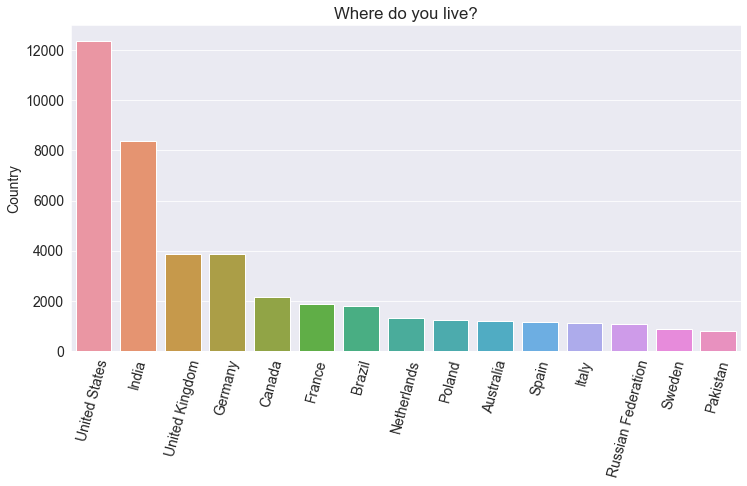

In [70]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries)

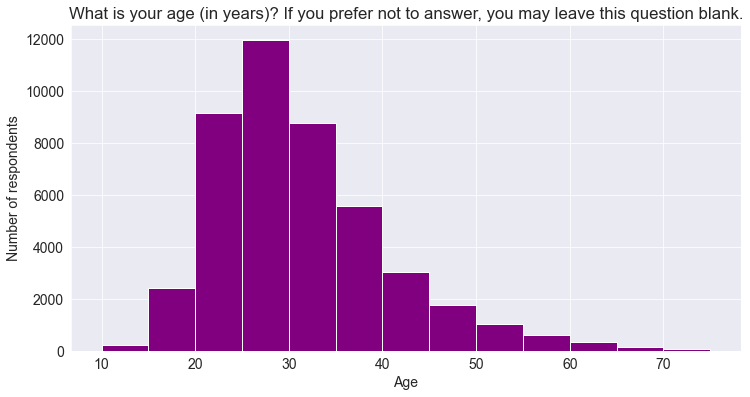

In [71]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

In [72]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [73]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

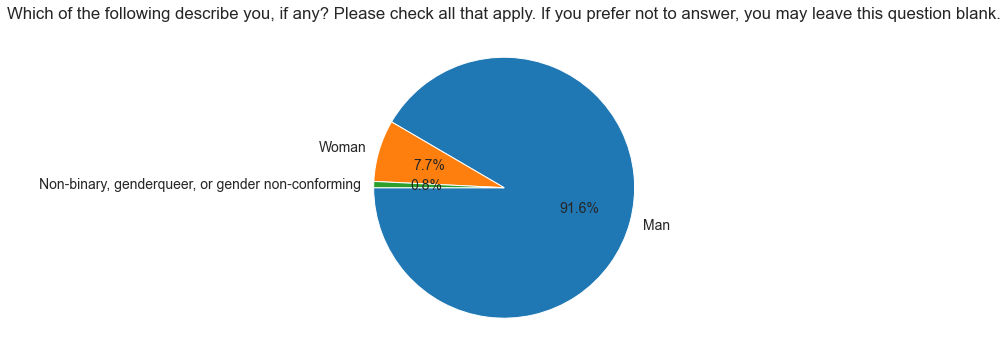

In [74]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

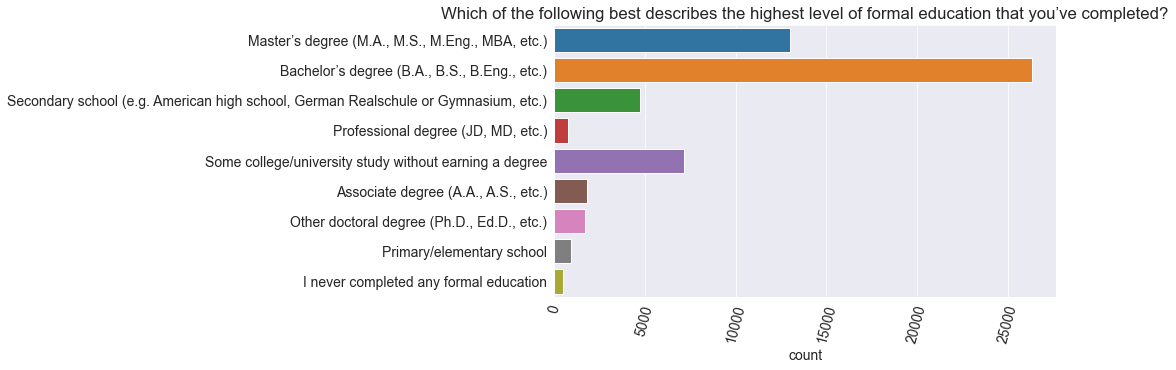

In [75]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

In [76]:
schema.UndergradMajor

'What was your primary field of study?'

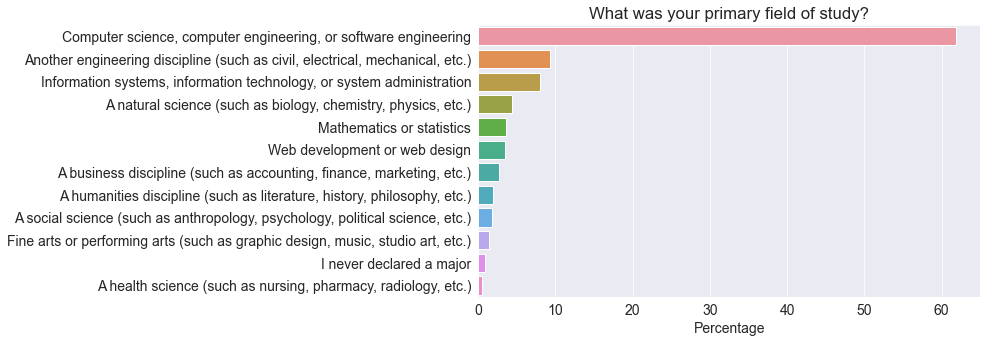

In [77]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

In [78]:
schema.Employment

'Which of the following best describes your current employment status?'

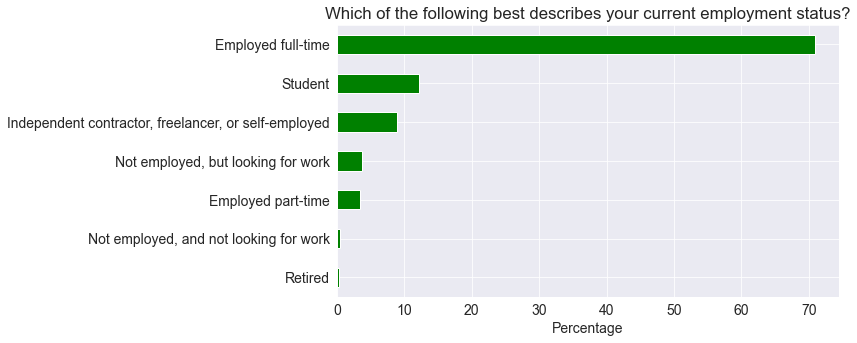

In [79]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

In [80]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [81]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                 4396
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                   3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                    

In [82]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [83]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [84]:
dev_type_df

Developer, desktop or enterprise applications  Developer, full-stack  \
0                                               True                   True   
1                                              False                   True   
2                                              False                  False   
3                                              False                  False   
4                                              False                  False   
...                                              ...                    ...   
64456                                          False                  False   
64457                                          False                  False   
64458                                          False                  False   
64459                                          False                  False   
64460                                          False                  False   

       Developer, mobile  Designer  Developer, front-end  Developer, back-end  \
0                  False     False                 False                False   
1                   True     False                 False                False   
2                  False     False                 False                False   
3                  False     False                 False                False   
4                  False     False                 False                False   
...                  ...       ...                   ...                  ...   
64456              False     False                 False                False   
64457              False     False                 False                False   
64458              False     False                 False                False   
64459              False     False                 False                False   
64460              False     False                 False                False   

       Developer, QA or test  DevOps specialist  Developer, game or graphics  \
0                      False              False                        False   
1                      False              False                        False   
2                      False              False                        False   
3                      False              False                        False   
4                      False              False                        False   
...                      ...                ...                          ...   
64456                  False              False                        False   
64457                  False              False                        False   
64458                  False              False                        False   
64459                  False              False                        False   
64460                  False              False                        False   

       Database administrator  ...  System administrator  Engineering manager  \
0                       False  ...                 False                False   
1                       False  ...                 False                False   
2                       False  ...                 False                False   
3                       False  ...                 False                False   
4                       False  ...                 False                False   
...                       ...  ...                   ...                  ...   
64456                   False  ...                 False                False   
64457                   False  ...                 False                False   
64458                   False  ...                 False                False   
64459                   False  ...                 False                False   
64460                   False  ...                 False                False   

       Product manager  Data or business analyst  Academic researcher  \
0                False                     False                False   
1    

In [85]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

In [86]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [87]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [88]:
languages_worked_df

C#  HTML/CSS  JavaScript  Swift  Objective-C  Python   Ruby    SQL  \
0       True      True        True  False        False   False  False  False   
1      False     False        True   True        False   False  False  False   
2      False     False       False   True         True    True  False  False   
3      False     False       False  False        False   False  False  False   
4      False      True       False  False        False   False   True   True   
...      ...       ...         ...    ...          ...     ...    ...    ...   
64456  False     False       False  False        False   False  False  False   
64457   True      True        True   True         True    True   True   True   
64458  False     False       False  False        False   False  False  False   
64459  False      True       False  False        False   False  False  False   
64460   True      True        True  False        False   False  False   True   

        Java    PHP  ...    VBA   Perl  Scala    C++     Go  Haskell   Rust  \
0      False  False  ...  False  False  False  False  False    False  False   
1      False  False  ...  False  False  False  False  False    False  False   
2      False  False  ...  False  False  False  False  False    False  False   
3      False  False  ...  False  False  False  False  False    False  False   
4      False  False  ...  False  False  False  False  False    False  False   
...      ...    ...  ...    ...    ...    ...    ...    ...      ...    ...   
64456  False  False  ...  False  False  False  False  False    False  False   
64457   True   True  ...   True   True   True   True   True     True   True   
64458  False  False  ...  False  False  False  False  False    False  False   
64459  False  False  ...  False  False  False  False  False    False  False   
64460   True  False  ...  False  False  False  False  False    False  False   

        Dart  Julia  Assembly  
0      False  False     False  
1      False  False     False  
2      False  False     False  
3      False  False     False  
4      False  False     False  
...      ...    ...       ...  
64456  False  False     False  
64457   True   True      True  
64458  False  False     False  
64459  False  False     False  
64460  False  False     False  

[64306 rows x 25 columns]

In [89]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

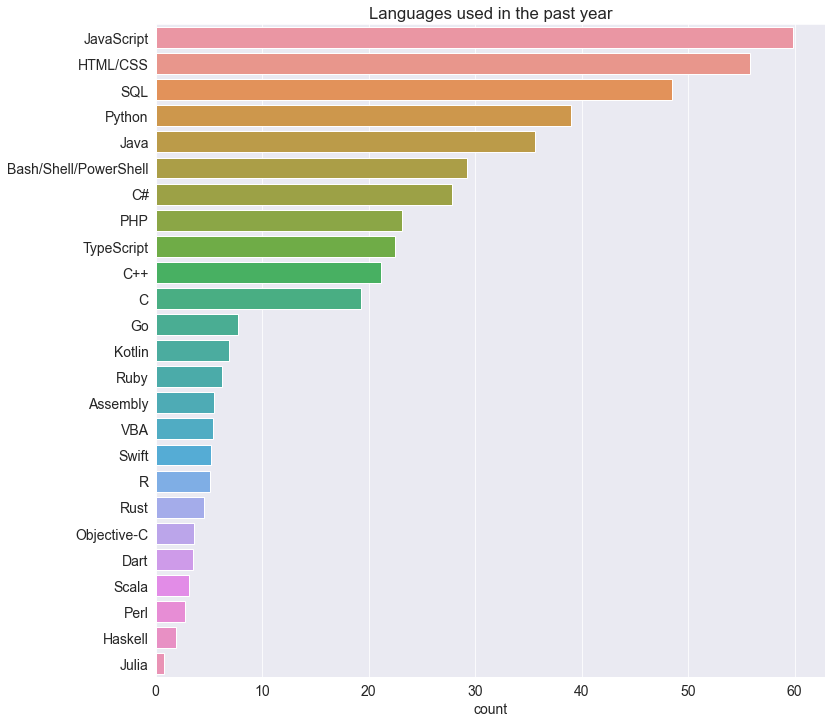

In [90]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

In [91]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

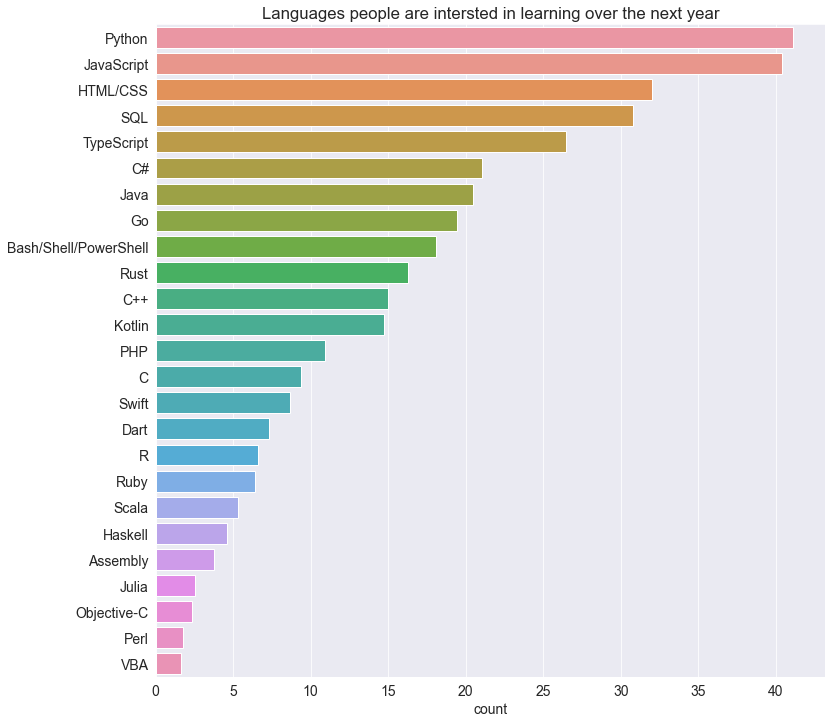

In [92]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

In [93]:
languages_loved_df = languages_worked_df & languages_interested_df

In [94]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

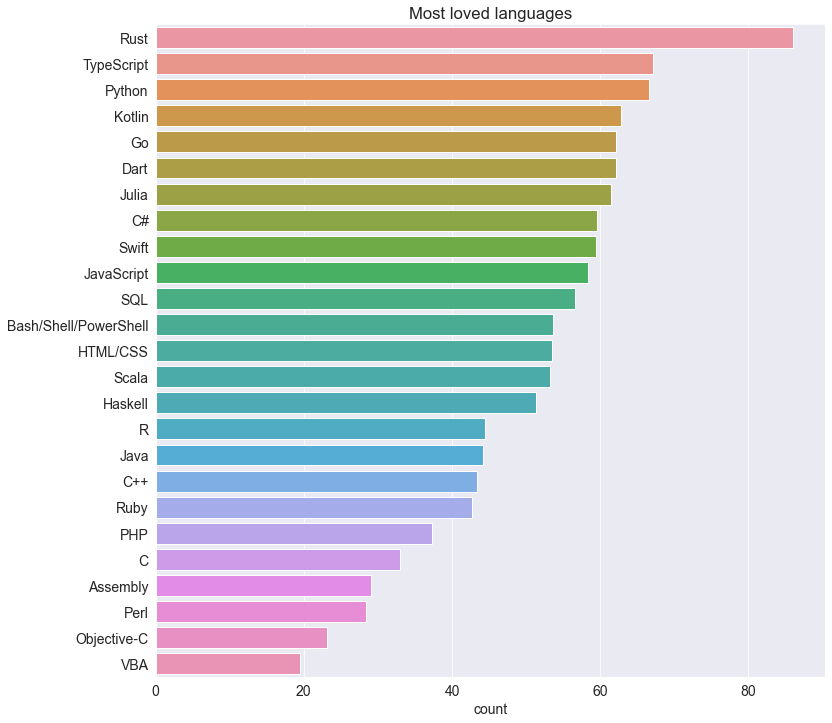

In [95]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

In [96]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [97]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [98]:
high_response_countries_df

WorkWeekHrs
Country                   
Iran             44.337748
Israel           43.915094
China            42.150000
United States    41.802982
Greece           41.402724
Viet Nam         41.391667
South Africa     41.023460
Turkey           40.982143
Sri Lanka        40.612245
New Zealand      40.457551
Belgium          40.444444
Canada           40.208837
Hungary          40.194340
Bangladesh       40.097458
India            40.090603

In [99]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

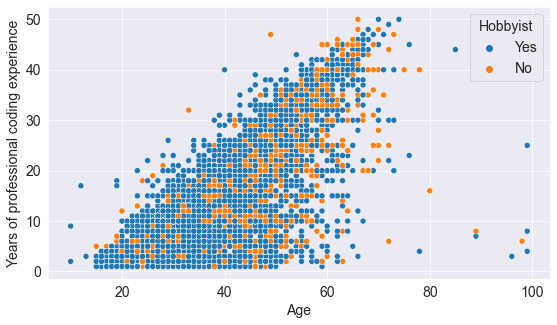

In [100]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

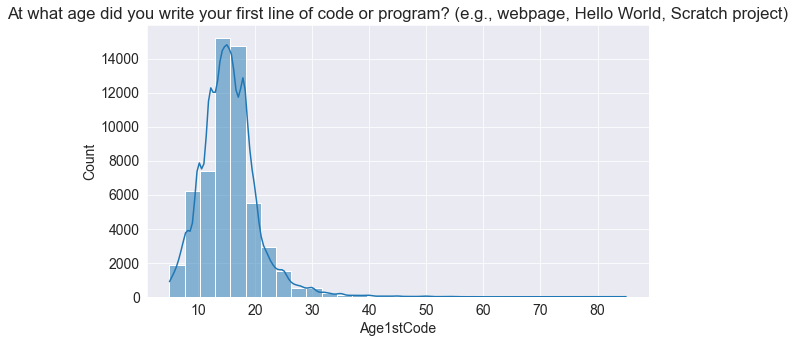

In [101]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);